[Previous: Judgemental forecasts](06-Judgmental-forecasts.ipynb)
• [Contents](Contents.ipynb)
• [Next: Exponential smoothing](08-Exponential-smoothing.ipynb)

# 7 Time series regression models

[FPP3 Chapter 7](https://otexts.com/fpp3/regression.html)

* [7.1 The linear model](#7.1-The-linear-model)
* [7.2 Least squares estimation](#7.2-Least-squares-estimation)
* [7.3 Evaluating the regression model](#7.3-Evaluating-the-regression-model)
* [7.4 Some useful predictors](#7.4-Some-useful-predictors)
* [7.5 Selecting predictors](#7.5-Selecting-predictors)
* [7.6 Forecasting with regression](#7.6-Forecasting-with-regression)
* [7.7 Matrix formulation](#7.7-Matrix-formulation)
* [7.8 Nonlinear regression](#7.8-Nonlinear-regression)
* [7.9 Correlation, causation and forecasting](#7.9-Correlation,-causation-and-forecasting)

<hr/>

In [1]:
import sys
sys.path.insert(0, '.')
from utils import *

[utils.py](utils.py)

## 7.1 The linear model

[FPP3 Section 7.1](https://otexts.com/fpp3/regression-intro.html)

### Simple linear regression

In [2]:
us_change = pd.read_csv('data/us_change.csv')
us_change = (
    us_change
    .assign(date=pd.to_datetime(us_change.Quarter.str.replace(' ', '')))
    .set_index('date')
)
us_change.head()

,Quarter,Consumption,Income,Production,Savings,Unemployment
date,,,,,,
1970-01-01,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
1970-04-01,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
1970-07-01,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
1970-10-01,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
1971-01-01,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1


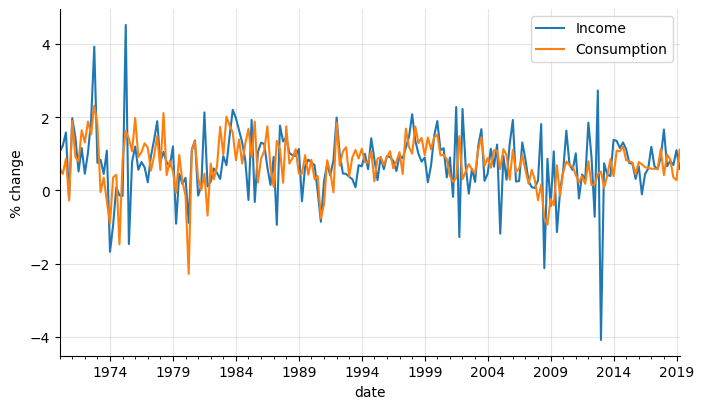

In [3]:
fig, ax = plt.subplots()
us_change['Income Consumption'.split()].plot(ax=ax)
ax.set(ylabel='% change')
ax.grid()

In [4]:
fit = smf.ols('Consumption ~ Income', us_change).fit()

In [5]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     33.84
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           2.40e-08
Time:                        20:09:32   Log-Likelihood:                -175.65
No. Observations:                 198   AIC:                             355.3
Df Residuals:                     196   BIC:                             361.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5445      0.054     10.079      0.000       0.438       0.651
Income         0.2718      0.047      5.817      0.000       0.180       0.364
==============================================================================
Omnibus:                       19.675   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.285
Skew:                          -0.476   Prob(JB):                     2.95e-09
Kurtosis:                       4.964   Cond. No.                         2.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

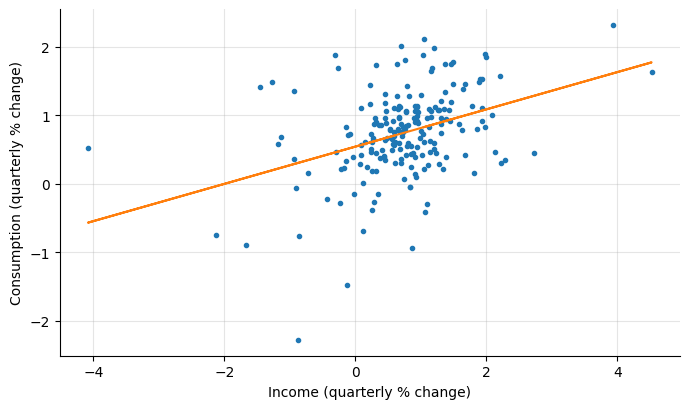

In [6]:
fig, ax = plt.subplots()
d = us_change
ax.plot(d.Income, d.Consumption, '.')
ax.plot(d.Income, fit.predict())
ax.set(ylabel="Consumption (quarterly % change)", xlabel="Income (quarterly % change)")
ax.grid()

### Multiple linear regression

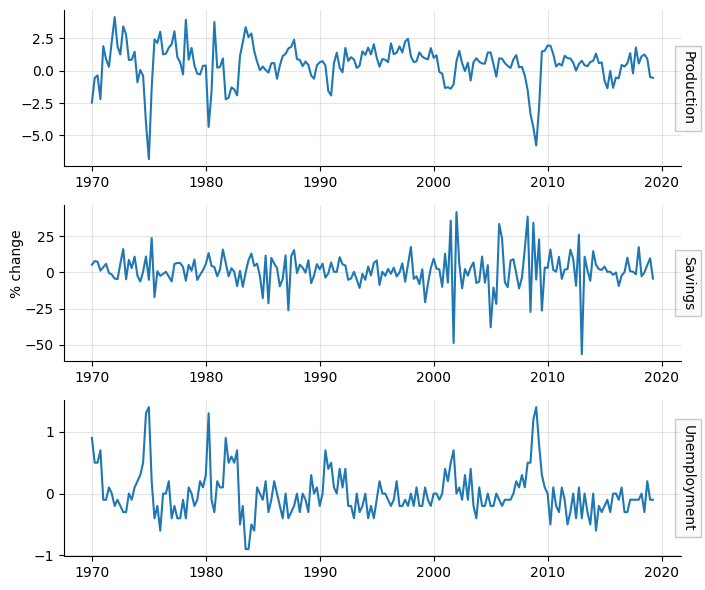

In [7]:
fig, axs = plt.subplots(3, figsize=(7,6))
for (ax, feature) in zip(axs, 'Production Savings Unemployment'.split()):
    ax.plot(us_change[feature])
    rlabel(ax, feature)
    ax.grid()
fig.text(0, .5, '% change', rotation=90)
plt.tight_layout()

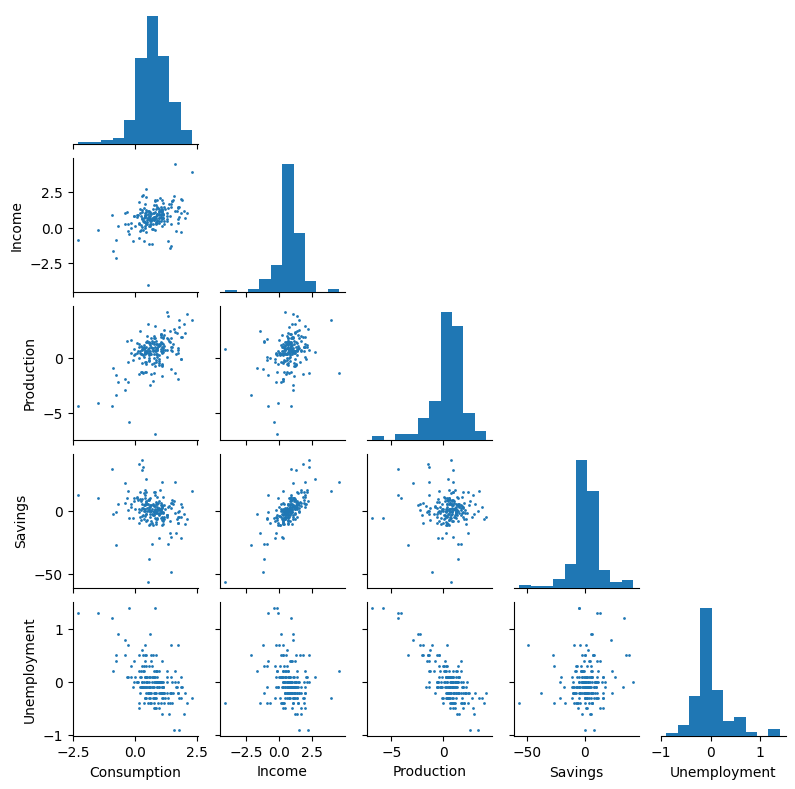

In [8]:
sns.pairplot(us_change, plot_kws=dict(linewidth=0, s=4), corner=True, height=1.55);

### Assumptions

## 7.2 Least squares estimation

[FPP3 Section 7.2](https://otexts.com/fpp3/least-squares.html)

### Example: US consumption expenditure

In [9]:
fit = smf.ols('Consumption ~ Income + Production + Unemployment + Savings', us_change).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           3.93e-60
Time:                        20:09:36   Log-Likelihood:                -46.660
No. Observations:                 198   AIC:                             103.3
Df Residuals:                     193   BIC:                             119.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2531      0.034      7.343      0.000       0.185       0.321
Income           0.7406      0.040     18.461      0.000       0.661       0.820
Production       0.0472      0.023      2.038      0.043       0.002       0.093
Unemployment    -0.1747      0.096     -1.829      0.069      -0.363       0.014
Savings         -0.0529      0.003    -18.088      0.000      -0.059      -0.047
==============================================================================
Omnibus:                       19.961   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.767
Skew:                           0.525   Prob(JB):                     1.71e-08
Kurtosis:                       4.798   Cond. No.                         53.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

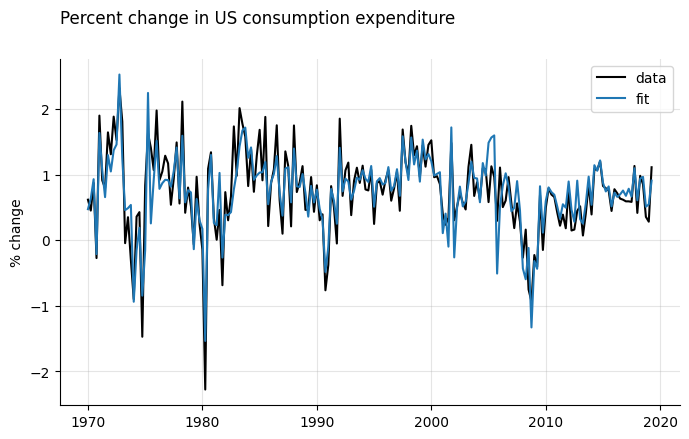

In [10]:
fig, ax = plt.subplots()
ax.plot(us_change.Consumption, label='data', color='k')
ax.plot(us_change.index, fit.predict(), label='fit')
ax.set(ylabel='% change')
suptitle('Percent change in US consumption expenditure')
ax.legend()
ax.grid()

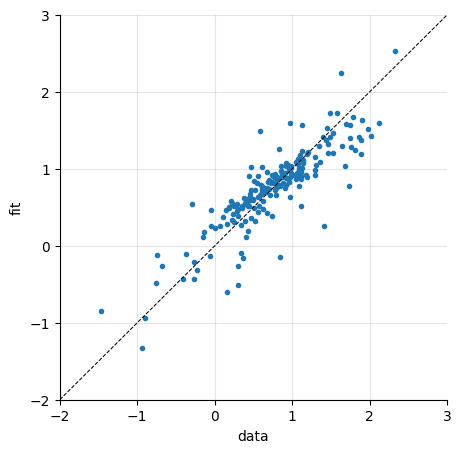

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(us_change.Consumption, fit.predict(), '.')
lim = -2, 3
ax.plot(lim, lim, 'k--', lw=.75)
ax.set(xlim=lim, ylim=lim, xlabel='data', ylabel='fit')
ax.grid()

### Goodness-of-fit

*Highlight:* The $R^2$ value is used frequently, though often incorrectly, in forecasting.

### Example: US consumption expenditure

In [12]:
print(f'R^2 = {fit.rsquared:.3f}  |  r = {np.sqrt(fit.rsquared):.3f}')

R^2 = 0.768  |  r = 0.877


### Standard error of the regression

\begin{equation}
  \hat{\sigma}_e=\sqrt{\frac{1}{T-k-1}\sum_{t=1}^{T}{e_t^2}},
\end{equation}

Standard deviation doesn't account for nparams:

In [13]:
resid = (us_change.Consumption - fit.predict())
resid.std()

0.30704811253752423

In [14]:
len(fit.params)

5

Residual standard error:

In [15]:
np.sqrt(np.sum(resid**2) / (len(us_change) - len(fit.params) - 1))

0.31102043954414416

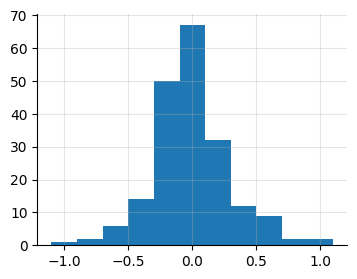

In [16]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(resid, bins=11, range=(-1.1, 1.1))
ax.grid()

## 7.3 Evaluating the regression model

[FPP3 Section 7.3](https://otexts.com/fpp3/regression-evaluation.html)

In [17]:
ypred = pd.Series(fit.predict(), index=us_change.index)

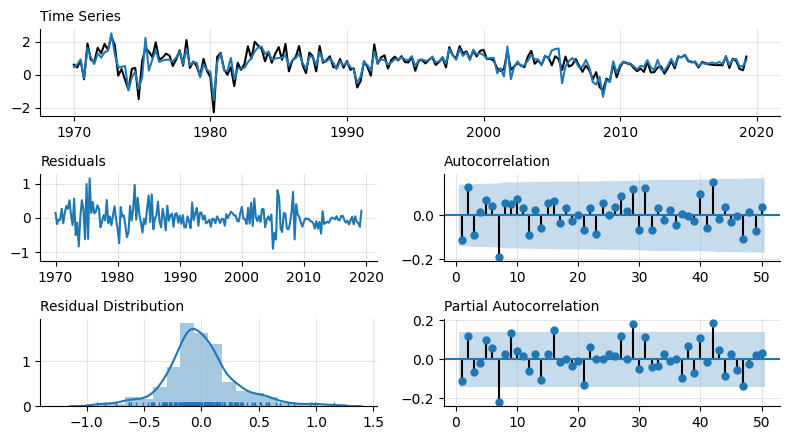

In [18]:
plot_tsresiduals(us_change.Consumption, ypred, acf_lags=np.r_[1:51]);

### ACF plot of residuals

In [19]:
sm.stats.acorr_ljungbox(
    resid, lags=[10], model_df=5, boxpierce=True, return_df=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,18.865322,0.002036,18.19325,0.002714


### Residual plots against predictors

#### Example

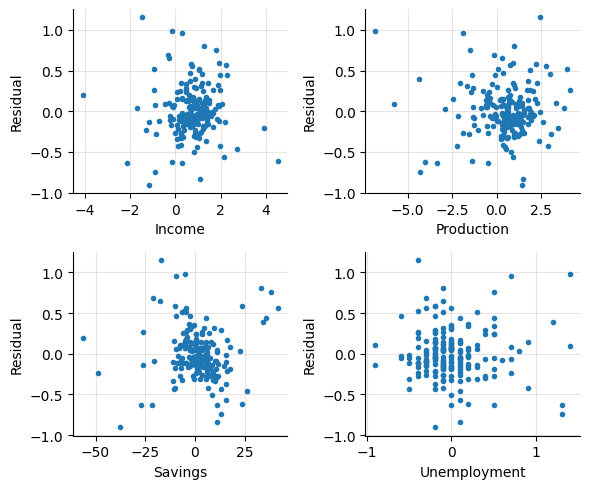

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(6,5))
axs = axs.ravel()
features = 'Income Production Savings Unemployment'.split()
for (ax, feature) in zip(axs, features):
    ax.plot(us_change[feature], resid, '.')
    ax.set(xlabel=feature, ylabel='Residual')
    ax.grid()
plt.tight_layout()

### Residual plots against fitted values

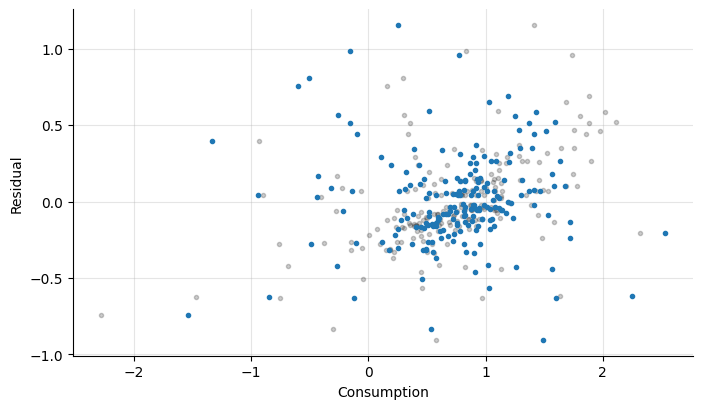

In [21]:
fig, ax = plt.subplots()
ax.plot(us_change.Consumption, resid, 'k.', alpha=.2, label='data')
ax.plot(ypred, resid, '.', label='fit')
ax.set(xlabel='Consumption', ylabel='Residual')
ax.grid()

### Outliers and influential observations

#### Example

### Spurious regression

In [22]:
air = pd.read_csv('data/aus_airpassengers.csv')
air = (
    air
    .assign(date=pd.to_datetime(air.Year, format='%Y'))
    .set_index('date')
)

In [23]:
rice = pd.read_csv('data/guinea_rice.csv')
rice = (
    rice
    .assign(date=pd.to_datetime(rice.Year, format='%Y'))
    .set_index('date')
)

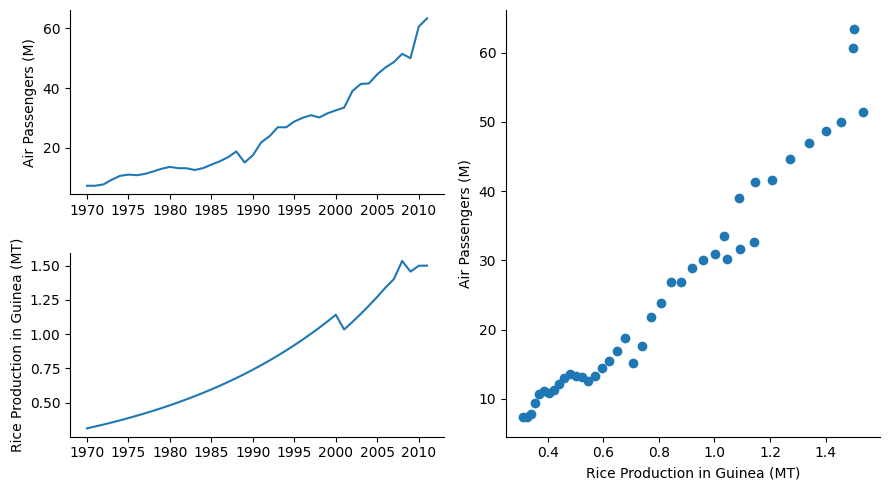

In [24]:
fig = plt.figure(figsize=(9,5))
gs = fig.add_gridspec(2, 2)
lab1 = 'Air Passengers (M)'
lab2 = 'Rice Production in Guinea (MT)'

ax = fig.add_subplot(gs[0,0])
ax.plot(air.Passengers)
ax.set(ylabel=lab1)

ax = fig.add_subplot(gs[1,0])
ax.plot(rice.Production)
ax.set(ylabel=lab2)

ax = fig.add_subplot(gs[:,1])
ax.scatter(rice.Production, air.Passengers)
ax.set(xlabel=lab2, ylabel=lab1)
plt.tight_layout()

In [25]:
both = air.join(rice.drop(columns='Year'))
fit = smf.ols('Passengers ~ Production', both).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     908.1
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           4.08e-29
Time:                        20:09:38   Log-Likelihood:                -107.93
No. Observations:                  42   AIC:                             219.9
Df Residuals:                      40   BIC:                             223.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4925      1.203     -6.229      0.000      -9.924      -5.061
Production    40.2879      1.337     30.135      0.000      37.586      42.990
==============================================================================
Omnibus:                        8.775   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.057
Skew:                           0.716   Prob(JB):                       0.0108
Kurtosis:                       4.767   Cond. No.                         4.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
ypred = pd.Series(fit.predict(), both.index)

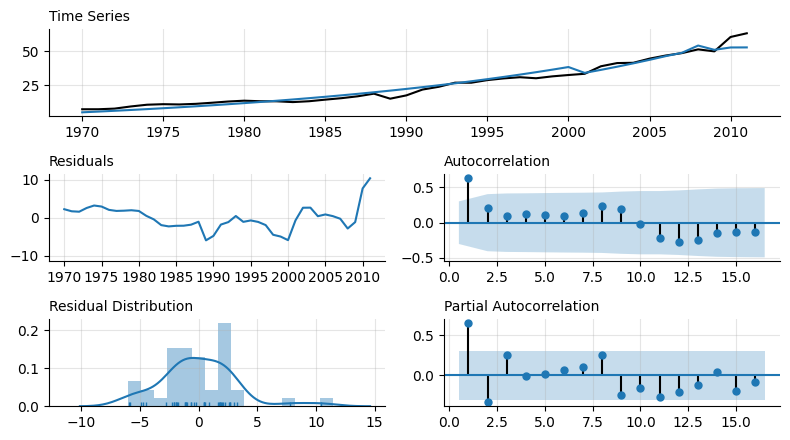

In [27]:
plot_tsresiduals(both.Passengers, ypred, acf_lags=np.r_[1:17]);

## 7.4 Some useful predictors

[FPP3 Section 7.4](https://otexts.com/fpp3/useful-predictors.html)

### Trend

Can just use $x_{1,t} = t$ as a predicton.

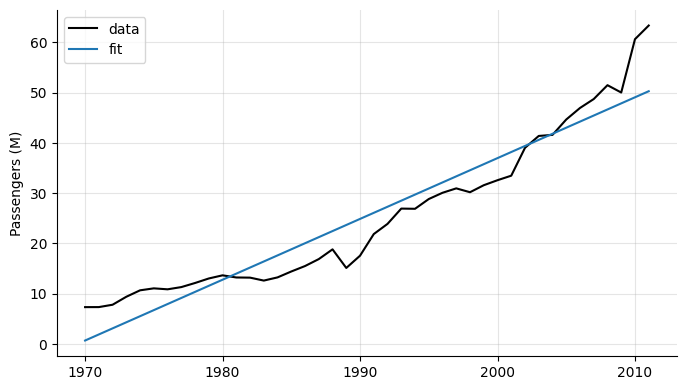

In [28]:
fig, ax = plt.subplots()
fit = smf.ols('Passengers ~ Year', air).fit()
ax.plot(air.Year, air.Passengers, color='k', label='data')
ax.plot(air.Year, fit.predict(), label='fit')
ax.legend()
ax.set(ylabel='Passengers (M)')
ax.grid()

### Dummy variables

`OLS` automatically creates a leave-on-out one-hot encoding for categorical values:

In [29]:
d = air.assign(cat=np.random.choice(list('ABCD'), size=len(air)))
smf.ols('Passengers ~ Year + cat', d).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     99.29
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           2.94e-19
Time:                        20:09:39   Log-Likelihood:                -122.70
No. Observations:                  42   AIC:                             255.4
Df Residuals:                      37   BIC:                             264.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2380.4344    121.336    -19.618      0.000   -2626.285   -2134.583
cat[T.B]       1.3329      2.041      0.653      0.518      -2.802       5.468
cat[T.C]       3.7551      2.582      1.455      0.154      -1.476       8.986
cat[T.D]       0.0309      1.900      0.016      0.987      -3.819       3.881
Year           1.2083      0.061     19.825      0.000       1.085       1.332
==============================================================================
Omnibus:                        5.105   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                3.907
Skew:                           0.707   Prob(JB):                        0.142
Kurtosis:                       3.483   Cond. No.                     3.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Seasonal dummy variables

Create 6 features to model days of week, 3 to model quarters, 11 to model months, etc.

#### Example: Australian quarterly beer production

In [30]:
d = pd.read_csv('data/aus_production.csv')
aus_production = (
    d
    .assign(Date=pd.to_datetime(d.Quarter.str.replace(' ', '')))
    .set_index('Date')
)
recent_production = aus_production.query("Date.dt.year >= 1992")

Model: quarterly plus linear trend.

In [31]:
d = recent_production.assign(
    quarter = recent_production.index.quarter,
    index = np.arange(len(recent_production)))
fit = smf.ols('Beer ~ index + C(quarter)', d).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Beer   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           6.97e-38
Time:                        20:09:40   Log-Likelihood:                -287.70
No. Observations:                  74   AIC:                             585.4
Df Residuals:                      69   BIC:                             596.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         441.4602      3.690    119.639      0.000     434.099     448.821
C(quarter)[T.2]   -34.6597      3.968     -8.734      0.000     -42.576     -26.743
C(quarter)[T.3]   -17.8216      4.022     -4.430      0.000     -25.846      -9.797
C(quarter)[T.4]    72.7964      4.023     18.095      0.000      64.771      80.822
index              -0.3403      0.067     -5.111      0.000      -0.473      -0.207
==============================================================================
Omnibus:                        8.236   Durbin-Watson:                   2.493
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.461
Skew:                          -0.589   Prob(JB):                       0.0145
Kurtosis:                       4.165   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

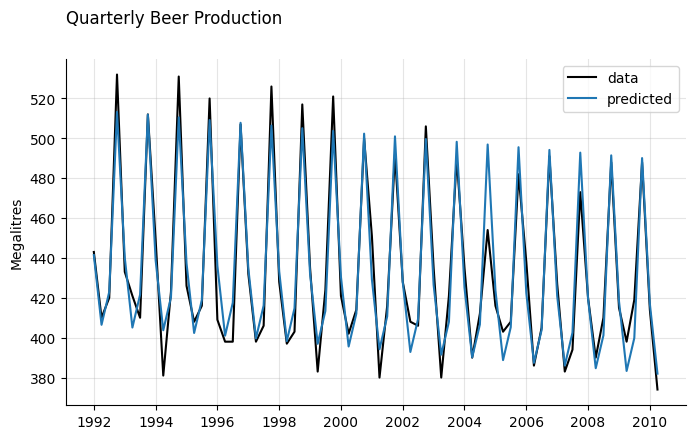

In [32]:
ypred = pd.Series(fit.predict(), index=d.index)
fig, ax = plt.subplots()
ax.plot(d.Beer, color='k', label='data')
ax.plot(ypred, label='predicted')
ax.legend()
ax.set(ylabel='Megalitres')
suptitle('Quarterly Beer Production')
ax.grid()

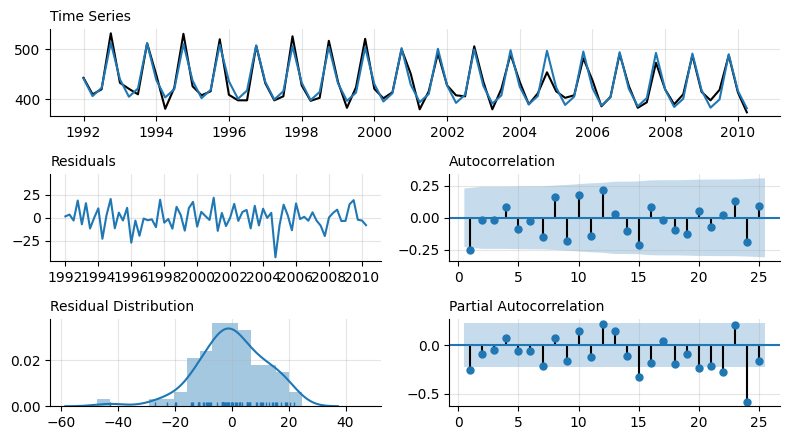

In [33]:
plot_tsresiduals(d.Beer, ypred);

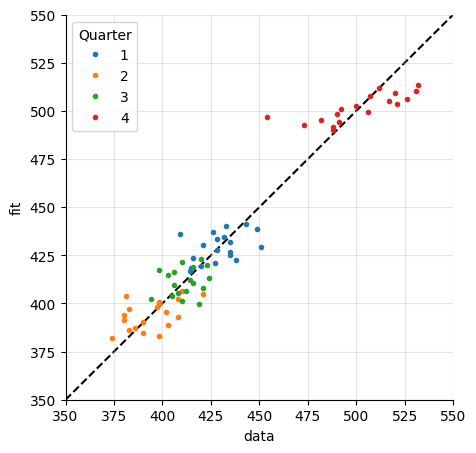

In [34]:
fig, ax = plt.subplots(figsize=(5,5))
dd = d.assign(ypred=ypred)
for (q, df) in dd.groupby('quarter'):
    ax.plot(df.Beer, df.ypred, '.', label=q)
lim = 350, 550
ax.plot(lim, lim, 'k--', zorder=-10)
ax.legend(title='Quarter')
ax.set(xlabel='data', ylabel='fit', xlim=lim, ylim=lim)
ax.grid()

### Intervention variables

* Competitors, spending, etc.
* "Spike" boolean
* Step boolean
* Piecewise trend

### Trading days

* Number of trading days per month
* Number of (mon,tue,wed,etc.) per month

### Distributed lags

* $x_{1...m}$: predictor values captured 1–m months ago.

### Easter

* Dummy variable for whether a recurring but irregular event happened in a period.

### Fourier series

**TODO:** statsmodels just added sm.tsa.deterministic module to `master` on June 1.  It's not yet released, but I think it will facilitate this.

https://github.com/statsmodels/statsmodels/commits/master/statsmodels/tsa/deterministic.py

**TODO:** alternatively, [statsmodels UnobservedComponents](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html) might already be sufficient to get this job done.

## 7.5 Selecting predictors

[FPP3 Section 7.5](https://otexts.com/fpp3/selecting-predictors.html)

Statsmodels summary shows most metrics considered in the [original](https://otexts.com/fpp3/selecting-predictors.html) text, with the exception of cross validation (CV) and corrected AIC (AICc).

In [35]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Beer   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           6.97e-38
Time:                        20:09:41   Log-Likelihood:                -287.70
No. Observations:                  74   AIC:                             585.4
Df Residuals:                      69   BIC:                             596.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         441.4602      3.690    119.639      0.000     434.099     448.821
C(quarter)[T.2]   -34.6597      3.968     -8.734      0.000     -42.576     -26.743
C(quarter)[T.3]   -17.8216      4.022     -4.430      0.000     -25.846      -9.797
C(quarter)[T.4]    72.7964      4.023     18.095      0.000      64.771      80.822
index              -0.3403      0.067     -5.111      0.000      -0.473      -0.207
==============================================================================
Omnibus:                        8.236   Durbin-Watson:                   2.493
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.461
Skew:                          -0.589   Prob(JB):                       0.0145
Kurtosis:                       4.165   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adjusted $R^2$

### Cross-validation

### Akaike’s Information Criterion

Note: for sufficient stats, minimizing AIC is equivalent to minimizing CV.

### Corrected Akaike’s Information Criterion

Only available for certain kinds of statsmodels models...

$$\text{AIC}_{\text{c}} = \text{AIC} + \frac{2(k+2)(k+3)}{T-k-3}.$$

### Schwarz’s Bayesian Information Criterion

### Which measure should we use?

Not $R^2$, and probably not even $\bar{R}^2$.

### Example: US consumption

In [36]:
features = np.array(features)
features

array(['Income', 'Production', 'Savings', 'Unemployment'], dtype='<U12')

In [37]:
opts = False, True

In [38]:
results = []
for feature_mask in itertools.product(opts, opts, opts, opts):
    if not any(feature_mask):
        continue
    feature_mask = np.array(feature_mask)
    model = 'Consumption ~ ' + '+'.join(features[feature_mask])
    res = smf.ols(model, us_change).fit()
    row = dict(zip(features, 1*feature_mask))
    row.update(dict(
        rsquared = res.rsquared,
        rsquared_adj = res.rsquared_adj,
        aic = res.aic,
        bic = res.bic,
    ))
    results.append(row)
results = pd.DataFrame(results)

In [39]:
results.sort_values('bic')

,Income,Production,Savings,Unemployment,rsquared,rsquared_adj,aic,bic
13,1,1,1,0,0.764267,0.760621,104.722150,117.875218
10,1,0,1,1,0.763294,0.759634,105.537266,118.690334
14,1,1,1,1,0.768283,0.763481,103.319799,119.761134
9,1,0,1,0,0.737281,0.734586,124.182562,134.047363
12,1,1,0,1,0.375494,0.365836,297.625779,310.778847
8,1,0,0,1,0.351635,0.344985,303.049317,312.914118
11,1,1,0,0,0.342768,0.336027,305.738892,315.603693
6,0,1,1,1,0.359084,0.349173,302.761265,315.914333
5,0,1,1,0,0.331109,0.324248,309.220527,319.085328
2,0,0,1,1,0.318188,0.311195,313.008582,322.873384


**TODO:** why AIC/BIC so different in statsmodels output?

### Best subset regression

### Stepwise regression

### Beware of inference after selecting predictors

## 7.6 Forecasting with regression

[FPP3 Section 7.6](https://otexts.com/fpp3/forecasting-regression.html)

### Ex-ante versus ex-post forecasts

In [40]:
d = recent_production.assign(
    quarter = recent_production.index.quarter,
    index = np.arange(len(recent_production)))
split = '2008'
dtrain, dtest = d[:split], d[split:]
fit = smf.ols('Beer ~ index + C(quarter)', dtrain).fit()

**TODO:** would be nice to wrap this functionality in a nice `plot_forecast()` or so.

**TODO:** But wait, shouldn't [SARIMAX](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html) be able to handle this, if `order=(0,0,0)`?

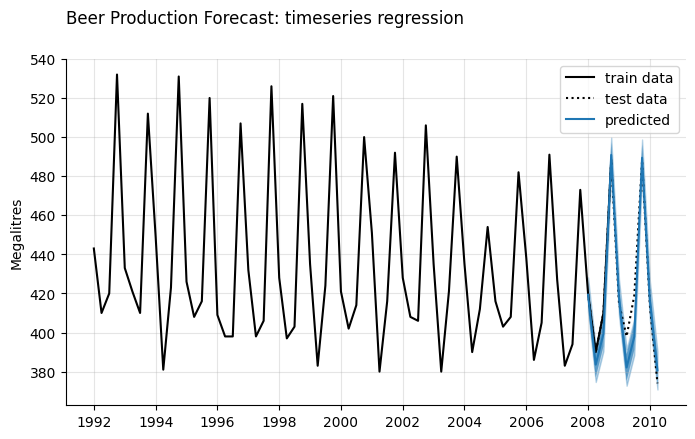

In [41]:
pr = fit.get_prediction(dtest)
pred = (
    pr.summary_frame(alpha=.1)
    .join(pr.summary_frame(alpha=.025), lsuffix='_80', rsuffix='_95')
    .set_index(dtest.index)
)
fig, ax = plt.subplots()
ax.plot(dtrain.Beer, 'k', label='train data')
ax.plot(dtest.Beer, 'k:', label='test data')
ax.plot(pred.mean_80, label='predicted')
ax.fill_between(pred.index, pred.mean_ci_lower_80, pred.mean_ci_upper_80, alpha=.6)
ax.fill_between(pred.index, pred.mean_ci_lower_95, pred.mean_ci_upper_95, alpha=.3, color='C0')
ax.legend()
ax.set(ylabel='Megalitres')
suptitle('Beer Production Forecast: timeseries regression')
ax.grid()

### Scenario based forecasting

In [42]:
d = us_change
fit = smf.ols('Consumption ~ Income + Unemployment + Savings', d).fit()

In [43]:
tend = d.index.max()
index = pd.date_range(tend, tend + pd.to_timedelta('2y'), freq=d.index.inferred_freq)
up_future = pd.DataFrame(len(index) * [dict(Income = 1, Savings = .5, Unemployment = 0)])
down_future = pd.DataFrame(len(index) * [dict(Income = -1, Savings = -.5, Unemployment = 0)])

In [44]:
pr = fit.get_prediction(up_future)
up_pred = (
    pr.summary_frame(alpha=.2)
    .join(pr.summary_frame(alpha=.05), lsuffix='_80', rsuffix='_95')
    .set_index(index)
)
pr = fit.get_prediction(down_future)
down_pred = (
    pr.summary_frame(alpha=.2)
    .join(pr.summary_frame(alpha=.05), lsuffix='_80', rsuffix='_95')
    .set_index(index)
)

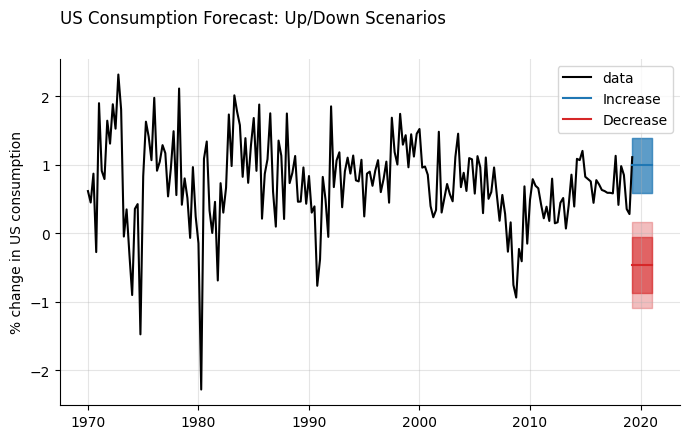

In [45]:
fig, ax = plt.subplots()
ax.plot(d.Consumption, 'k', label='data')
ax.plot(up_pred.mean_80, label='Increase', color='C0')
ax.plot(down_pred.mean_80, label='Decrease', color='C3')
ax.fill_between(up_pred.index, up_pred.obs_ci_lower_80, up_pred.obs_ci_upper_80, alpha=.6, color='C0')
ax.fill_between(up_pred.index, up_pred.obs_ci_lower_80, up_pred.obs_ci_upper_80, alpha=.3, color='C0')
ax.fill_between(down_pred.index, down_pred.obs_ci_lower_80, down_pred.obs_ci_upper_80, alpha=.6, color='C3')
ax.fill_between(down_pred.index, down_pred.obs_ci_lower_95, down_pred.obs_ci_upper_95, alpha=.3, color='C3')
ax.legend()
ax.set(ylabel='% change in US consumption')
suptitle('US Consumption Forecast: Up/Down Scenarios')
ax.grid()

### Building a predictive regression model

Forecasting predictors can be harder than working without them, but one solution is lagging predictors.

In [46]:
d = us_change.copy()
features = 'Income Unemployment Savings'.split()
for feature in features:
    d[feature] = d[feature].shift(8) # 2 year
fit = smf.ols('Consumption ~ Income + Unemployment + Savings', d).fit()

In [47]:
tend = d.index.max()
index = pd.date_range(tend, tend + pd.to_timedelta('2y'), freq=d.index.inferred_freq)
future = us_change[features].iloc[-8:].set_index(index)

In [48]:
pr = fit.get_prediction(future)
pred = (
    pr.summary_frame(alpha=.2)
    .join(pr.summary_frame(alpha=.05), lsuffix='_80', rsuffix='_95')
    .set_index(index)
)

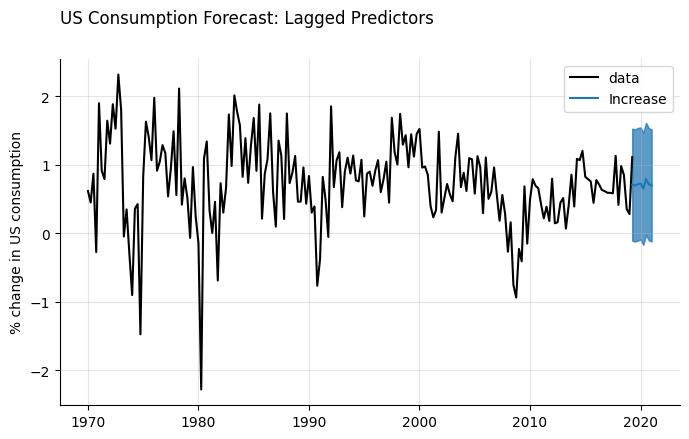

In [49]:
fig, ax = plt.subplots()
ax.plot(d.Consumption, 'k', label='data')
ax.plot(pred.mean_80, label='Increase', color='C0')
ax.fill_between(pred.index, pred.obs_ci_lower_80, pred.obs_ci_upper_80, alpha=.6, color='C0')
ax.fill_between(pred.index, pred.obs_ci_lower_80, pred.obs_ci_upper_80, alpha=.3, color='C0')
ax.legend()
ax.set(ylabel='% change in US consumption')
suptitle('US Consumption Forecast: Lagged Predictors')
ax.grid()

### Prediction intervals

#### Example

In [50]:
d = us_change
fit = smf.ols('Consumption ~ Income + 1', d).fit()

In [51]:
tend = d.index.max()
index = pd.date_range(tend, tend + pd.to_timedelta('2y'), freq=d.index.inferred_freq)
avg_future = pd.DataFrame(len(index) * [dict(Income = d.Income.mean())])
extreme_future = pd.DataFrame(len(index) * [dict(Income = 12)])

In [52]:
pr = fit.get_prediction(avg_future)
avg_pred = (
    pr.summary_frame(alpha=.2)
    .join(pr.summary_frame(alpha=.05), lsuffix='_80', rsuffix='_95')
    .set_index(index)
)
pr = fit.get_prediction(extreme_future)
extreme_pred = (
    pr.summary_frame(alpha=.2)
    .join(pr.summary_frame(alpha=.05), lsuffix='_80', rsuffix='_95')
    .set_index(index)
)

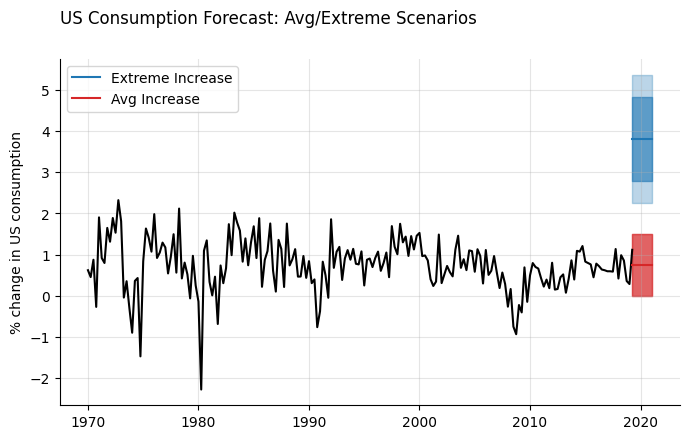

In [53]:
fig, ax = plt.subplots()
ax.plot(d.Consumption, 'k')
ax.plot(extreme_pred.mean_80, label='Extreme Increase', color='C0')
ax.plot(avg_pred.mean_80, label='Avg Increase', color='C3')
ax.fill_between(extreme_pred.index, extreme_pred.obs_ci_lower_80, extreme_pred.obs_ci_upper_80, alpha=.6, color='C0')
ax.fill_between(extreme_pred.index, extreme_pred.obs_ci_lower_95, extreme_pred.obs_ci_upper_95, alpha=.3, color='C0')
ax.fill_between(avg_pred.index, avg_pred.obs_ci_lower_80, avg_pred.obs_ci_upper_80, alpha=.6, color='C3')
ax.fill_between(avg_pred.index, avg_pred.obs_ci_lower_80, avg_pred.obs_ci_upper_80, alpha=.3, color='C3')
ax.legend(loc='upper left')
ax.set(ylabel='% change in US consumption')
suptitle('US Consumption Forecast: Avg/Extreme Scenarios')
ax.grid()

## 7.7 Matrix formulation

[FPP3 Section 7.7](https://otexts.com/fpp3/regression-matrices.html)

### Least squares estimation

### Fitted values and cross-validation

### Forecasts and prediction intervals

## 7.8 Nonlinear regression

[FPP3 Section 7.8](https://otexts.com/fpp3/nonlinear-regression.html)

### Forecasting with a nonlinear trend

#### Example: Boston marathon winning times

In [54]:
boston_men = pd.read_csv('data/boston_marathon.csv')
boston_men = (
    boston_men
    .pipe(compute, lambda x: dict(
        minutes = pd.to_timedelta(x.Time).dt.total_seconds() / 60
    ))
    .set_index('Year', drop=False)
    [boston_men.Event.str.contains('Men.*open').values].copy()
)
boston_men

,Event,Year,Champion,Country,Time,minutes
Year,,,,,,
1897,Men's open division,1897,John J. McDermott,United States,02:55:10,175.166667
1898,Men's open division,1898,Ronald J. MacDonald,Canada,02:42:00,162.000000
1899,Men's open division,1899,Lawrence Brignolia,United States,02:54:38,174.633333
1900,Men's open division,1900,John P. Caffery,Canada,02:39:44,159.733333
1901,Men's open division,1901,John P. Caffery,Canada,02:29:23,149.383333
...,...,...,...,...,...,...
2015,Men's open division,2015,Lelisa Desisa,Ethiopia,02:09:17,129.283333
2016,Men's open division,2016,Lemi Berhanu,Ethiopia,02:12:45,132.750000
2017,Men's open division,2017,Geoffrey Kirui,Kenya,02:09:37,129.616667


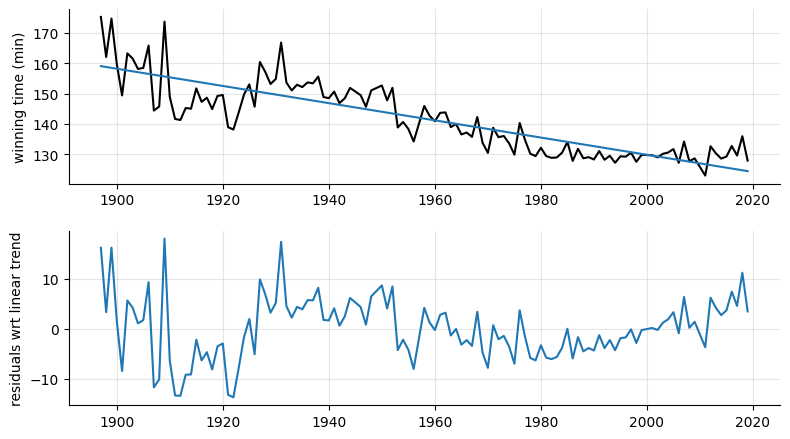

In [55]:
fig, (a1, a2) = plt.subplots(2)
a1.plot(boston_men.minutes, 'k')
lm = smf.ols('minutes ~ Year', boston_men).fit()
a1.plot(boston_men.Year, lm.predict())
a1.set(ylabel='winning time (min)')
a1.grid()
a2.plot(boston_men.minutes - lm.predict())
a2.set(ylabel='residuals wrt linear trend')
a2.grid()
plt.tight_layout()

Compare linear / log / piecewise linear:

In [56]:
d = boston_men
lm = smf.ols('minutes ~ Year', d).fit()
logm = smf.ols('np.log(minutes) ~ Year', d).fit()

It's not *that* big of a deal, but yeah it seems we have to add the non-linear features manually.

In [57]:
def add_knots(d, col, knots):
    d[f'{col}0'] = d[col]
    for (i, knot) in enumerate(knots):
        d[f'{col}{i+1}'] = np.where(d[col] > knot, d[col] - knot, 0)
    return d
        
d_knots = add_knots(boston_men.copy(), 'Year', (1940, 1980))
plm = smf.ols('minutes ~ Year0 + Year1 + Year2', d_knots).fit()

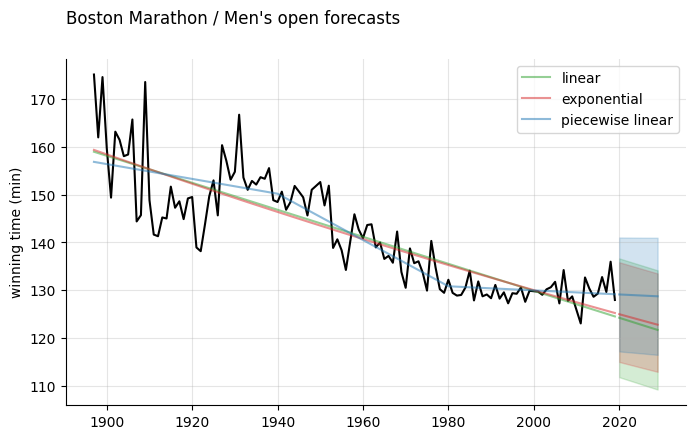

In [58]:
fig, ax = plt.subplots()
ax.plot(boston_men.minutes, 'k')

x0 = boston_men.Year
x = np.arange(10) + 1 + x0.max()
X = add_knots(pd.DataFrame(dict(Year=x)), 'Year', (1940, 1980))

c = 'C2'
pred = lm.get_prediction(X).summary_frame()
ax.plot(x0, lm.predict(), color=c, alpha=.5)
ax.plot(x, pred['mean'], color=c, alpha=.5, label='linear')
ax.fill_between(x, pred.obs_ci_lower, pred.obs_ci_upper, color=c, alpha=.2)

c = 'C3'
pred = logm.get_prediction(X).summary_frame()
ax.plot(x0, np.exp(logm.predict()), color=c, alpha=.5)
ax.plot(x, np.exp(pred['mean']), color=c, alpha=.5, label='exponential')
ax.fill_between(x, np.exp(pred.obs_ci_lower), np.exp(pred.obs_ci_upper), color=c, alpha=.2)

c = 'C0'
pred = plm.get_prediction(X).summary_frame()
ax.plot(x0, plm.predict(), color=c, alpha=.5)
ax.plot(x, pred['mean'], color=c, alpha=.5, label='piecewise linear')
ax.fill_between(x, pred.obs_ci_lower, pred.obs_ci_upper, color=c, alpha=.2)

ax.set(ylabel='winning time (min)')
suptitle('Boston Marathon / Men\'s open forecasts')
ax.legend()
ax.grid()


## 7.9 Correlation, causation and forecasting

[FPP3 Section 7.9](https://otexts.com/fpp3/causality.html)

### Correlation is not causation

### Forecasting with correlated predictors

### Multicollinearity and forecasting

<hr/>

[Previous: Judgemental forecasts](06-Judgmental-forecasts.ipynb)
• [Contents](Contents.ipynb)
• [Next: Exponential smoothing](08-Exponential-smoothing.ipynb)